In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/IRIS_dataset (2).csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df, columns=['species'], prefix=['species'])  #prefix species will add that prefix to all the columns
                                                                               #which form after OHE on 'species'


In [ ]:
one_hot_encoded

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
# Drop the original 'species' column
X = df.drop('species', axis=1)

In [ ]:
y=df['species']

In [ ]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
#display categorical variables
categorical = [col for col in X.columns if X[col].dtypes=='O']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
dtrain=scaler.fit

In [ ]:
from sklearn.model_selection import train_test_split   #used for splitting the data set into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
cols=X_train.columns
cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
one_hot_encoded.iloc[:,[0,1,2,3]] = scaler.fit_transform(one_hot_encoded.iloc[:,[0,1,2,3]])
one_hot_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,-0.900681,1.032057,-1.341272,-1.312977,1,0,0
1,-1.143017,-0.124958,-1.341272,-1.312977,1,0,0
2,-1.385353,0.337848,-1.398138,-1.312977,1,0,0
3,-1.506521,0.106445,-1.284407,-1.312977,1,0,0
4,-1.021849,1.263460,-1.341272,-1.312977,1,0,0


In [ ]:
def sigmoid(x):
  return(1/(1+np.exp(-x)))

In [ ]:
def accuracy(y_pred,y_true):
  count = 0
  for i,j in zip(y_pred,y_true):
    if np.array(i).argmax()==j.argmax():
      count +=1
  acc = count/150
  return acc

In [ ]:
def mse(y_pred,y_true):
  return ((y_pred - y_true).sum()/ (2*y_pred.size))

In [ ]:
#defining parameters
learning_rate = 0.01
epochs = 5000
input_size = 4
hidden_size = 2
output_size = 3


In [ ]:
#creating a dataframe to store results
results = pd.DataFrame(columns=["mse","accuracy"])

In [ ]:
np.random.seed(10)
#initializing weights for hidden layer
w1 = np.random.normal(scale=0.5,size=(input_size,hidden_size))  #scale is for the normal distribution
#initializing weights for output layer
w2 = np.random.normal(scale=0.5,size=(hidden_size,output_size))

In [ ]:
bias = np.random.rand(1)

In [ ]:
data1 = pd.get_dummies(df["species"])

In [ ]:
data1.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
for i in range(epochs):
  #feedforward on hidden layer
  z1 = np.dot(X,w1) + bias
  a1 = sigmoid(z1)

  #feedforward on output layer
  z2 = np.dot(a1,w2)
  a2 = sigmoid(z2)

  #calculating the loss
  mse1 = mse(a2,np.array(data1))
  acc = accuracy(a2,np.array(data1))
  df2 = {"mse": mse1,"accuracy": acc}
  results = results.append(df2,ignore_index=True)

  #calculating the derivatives
  #update for w2
  #dw2=-(df-a2)*(a2*(1-a2))*a1

  e1 = a2-data1

  #derivative
  dw1 = e1*a2*(1-a2)
  e2 = np.dot(dw1,w2.T)
  dw2 = e2*a1*(1-a1)
  w2_update = np.dot(a1.T,dw1)/150 #150 is number of samples
  w1_update = np.dot(X.T,dw2)/150

  w2 = w2 - learning_rate * w2_update
  w1 = w1 - learning_rate * w1_update


Streaming output truncated to the last 5000 lines.
<ipython-input-62-400aec0ae531>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(df2,ignore_index=True)
<ipython-input-62-400aec0ae531>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(df2,ignore_index=True)
<ipython-input-62-400aec0ae531>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(df2,ignore_index=True)
<ipython-input-62-400aec0ae531>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(df2,ignore_index=True)
<ipython-input-62-400aec0ae531>:14: FutureWarning: The frame.append metho

In [ ]:
results

,mse,accuracy
0,0.109817,0.333333
1,0.109817,0.333333
2,0.109700,0.333333
3,0.109583,0.333333
4,0.109467,0.333333
...,...,...
4996,0.019427,0.660000
4997,0.019429,0.660000
4998,0.019430,0.660000
4999,0.019431,0.660000


<Axes: >

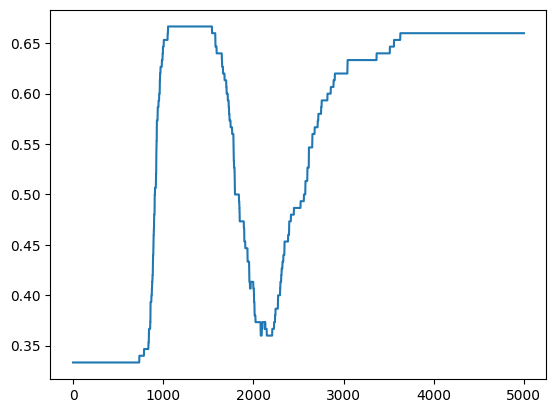

In [ ]:
results['accuracy'].plot()

<Axes: >

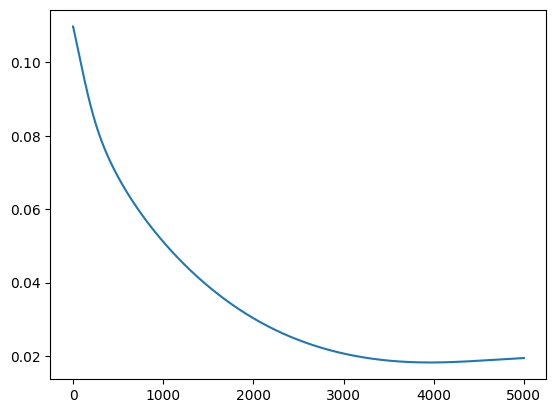

In [ ]:
results['mse'].plot()

For Learning rate 0.01-

500 epochs

5000 epochs - mse=0.019432	accuracy = 0.660000